In [1]:
import pandas as pd
import numpy as np
import aux.perfil as pf
import aux.acessos as ac

In [2]:
query = """

                    with uso_credito_pag as (	
                    select
                    cpf as nr_cpf,
                    'Pag' as ds_customer,
                    t.ds_nome_estabelecimento,
                    ds_grupo_mcc,
                    dt_mes  as dt_mes,
                    cast(substring(dt_horario, 1, 2) as integer) as fx_horario,
                    extract(dow from dt_data) as dia_semana,
                    case when substring(cast(a.cd_entry_mode as varchar), 1, 2) = '10' then 1 else 0 end as flag_recorrente,
                    (vl_transacao) as vl_spending
                    from backoffice_curated_zone.transaction t
                    left join platform_curated_zone.authorization_pag a  on a.id_transaction = t.id_autorizacao
                    where cd_tipo_mov = 1 
                    and ds_empresa='PAG'
                    and is_spending='Sim'
                    and t.is_cancelamento = 'Nao'
                    and dt_data >= to_date('2020-06-01', 'yyyy-mm-dd')
                    )	
                    , uso_credito_will as (	
                    select
                    nr_cpf,
                    ds_customer,
                    ds_nome_estabelecimento,
                    case 
                    when mcc_cd_grupo_mcc = 14  then 'SUPERMERCADO'
                    when mcc_cd_grupo_mcc = 1 then 'ALIMENTAÇÃO'
                    when mcc_cd_grupo_mcc = 13 then 'SERVIÇOS'
                    when mcc_cd_grupo_mcc = 4 then  'COMPRAS'
                    when mcc_cd_grupo_mcc = 15 then 'TRANSPORTE'
                    when mcc_cd_grupo_mcc = 3 then 'COMBUSTÍVEL'
                    when mcc_cd_grupo_mcc = 12 then 'SAÚDE'
                    when mcc_cd_grupo_mcc = 16 then 'VESTUÁRIO'
                    when mcc_cd_grupo_mcc = 7 then 'ELETRÔNICOS'
                    when mcc_cd_grupo_mcc = 8 then 'ENTRETENIMENTO'
                    when mcc_cd_grupo_mcc = 9 then 'OUTROS'
                    when mcc_cd_grupo_mcc = 2 then 'CASA'
                    when mcc_cd_grupo_mcc = 5 then 'CUIDADOS PESSOAIS'
                    when mcc_cd_grupo_mcc = 6 then 'EDUCACAO'
                    when mcc_cd_grupo_mcc = 10 then 'PET'
                    when mcc_cd_grupo_mcc = 17 then 'VIAGEM'
                    when mcc_cd_grupo_mcc = 11 then 'SAQUES'
                    end as ds_grupo_mcc,
                    substring(cast(dt_autorizacao as varchar), 1, 7)  as dt_mes,
                    cast(substring(cast(dt_autorizacao as varchar), 9, 2) as integer)  as fx_horario,
                    extract(dow from dt_autorizacao) as dia_semana,
                    case when substring(cast(cd_entry_mode as varchar), 1, 2) = '10' then 1 else 0 end as flag_recorrente,
                    (vl_real) as vl_spending
                    from	platform_curated_zone.authorization_will a
                    left join processed_zone_database_oracle_pag.mcc m on (m.mcc_cd_mcc = a.cd_mcc)
                    where   ds_transacao = 'credito'	
                    and	ds_status_compra = 'aprovada'
                    and ds_mcc != 'TRANSACOES WEBSERVICE'
                    and dt_autorizacao  >= to_date('2020-06-01', 'yyyy-mm-dd')
                    and	cd_retorno = '00'
                    )
                    , unificada as (
                    select * from uso_credito_pag
                    union all
                    select * from uso_credito_will
                    )
                    select * from unificada
                    tablesample bernoulli (0.5)
                    
"""

In [3]:
df = ac.df_athena('flavia-costa', query)

Failed to execute query.
Traceback (most recent call last):
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/pyathena/common.py", line 307, in _execute
    query_id = retry_api_call(
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/pyathena/util.py", line 84, in retry_api_call
    return retry(func, *args, **kwargs)
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/tenacity/__init__.py", line 430, in __call__
    do = self.iter(retry_state=retry_state)
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/tenacity/__init__.py", line 367, in iter
    return fut.result()
  File "/usr/lib/python3.9/concurrent/futures/_base.py", line 433, in result
    return self.__get_result()
  File "/usr/lib/python3.9/concurrent/futures/_base.py", line 389, in __get_result
    raise self._exception
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/tenacity/__init__.py", line 433, in __call__
    result = fn(*args, **kwargs)
  File "/home/flavia.

In [4]:
len(df)

823474

In [5]:
df2 = pf.traz_info('flavia-costa', df, 'nr_cpf')

Failed to execute query.
Traceback (most recent call last):
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/pyathena/common.py", line 307, in _execute
    query_id = retry_api_call(
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/pyathena/util.py", line 84, in retry_api_call
    return retry(func, *args, **kwargs)
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/tenacity/__init__.py", line 430, in __call__
    do = self.iter(retry_state=retry_state)
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/tenacity/__init__.py", line 367, in iter
    return fut.result()
  File "/usr/lib/python3.9/concurrent/futures/_base.py", line 433, in result
    return self.__get_result()
  File "/usr/lib/python3.9/concurrent/futures/_base.py", line 389, in __get_result
    raise self._exception
  File "/home/flavia.costa/.local/lib/python3.9/site-packages/tenacity/__init__.py", line 433, in __call__
    result = fn(*args, **kwargs)
  File "/home/flavia.

In [6]:
df2.head()

,nr_cpf,ds_customer,ds_nome_estabelecimento,ds_grupo_mcc,dt_mes,fx_horario,dia_semana,flag_recorrente,vl_spending,chave,...,pf_top_mcc,pf_cep,pf_recencia,pf_fx_recencia_mes,vl_real_hist,transacoes_hist,spending90dias,transacoes90dias,spending_ultimo_ano,transacoes_ultimo_ano
0,11302608797,will,MERCPAGO*FOREVERLISS,SUPERMERCADO,2021-07,17,6,1,285.02,11302608797,...,SUPERMERCADOS E MERCEARIAS,29031828,4.0,0.0,11605.20,190.0,5010.67,95.0,11605.20,190.0
1,10157961419,will,PAG*Rafaelbarbozadeal,SERVIÇOS,2021-09,20,1,0,6.50,10157961419,...,RESTAURANTES,58900000,22.0,0.0,2987.27,49.0,1424.20,23.0,2987.27,49.0
2,07306761536,will,UBER * PENDING,TRANSPORTE,2021-07,6,2,1,9.90,07306761536,...,TAXI E LIMUSINE,49030270,1.0,0.0,5256.41,196.0,1864.52,122.0,5256.41,196.0
3,71050032438,will,MAGALU *MAGAZINELUIZA,COMPRAS,2021-09,24,5,0,20.35,71050032438,...,POSTOS DE COMBUSTÍVEL,58421680,6.0,0.0,2310.55,47.0,1110.51,25.0,2310.55,47.0
4,00220055521,will,PAG*YasminVariedades,COMPRAS,2021-07,5,1,0,58.50,00220055521,...,FARMÁCIAS E FARMACÊUTICOS (MANIPULAÇÃO),46805000,17.0,0.0,51628.63,98.0,4073.38,7.0,32474.39,50.0


In [7]:
df2.columns

Index(['nr_cpf', 'ds_customer', 'ds_nome_estabelecimento', 'ds_grupo_mcc',
       'dt_mes', 'fx_horario', 'dia_semana', 'flag_recorrente', 'vl_spending',
       'chave', 'chave_or', 'ds_origin', 'pf_dt_nascimento', 'base_perfil',
       'pf_genero', 'pf_escolaridade', 'pf_renda_declarada_will',
       'pf_profissao', 'pf_estado_civil', 'pf_estado', 'pf_regiao',
       'pf_idade_conta', 'pf_faixa_idade', 'pf_cidade', 'pf_top_mcc', 'pf_cep',
       'pf_recencia', 'pf_fx_recencia_mes', 'vl_real_hist', 'transacoes_hist',
       'spending90dias', 'transacoes90dias', 'spending_ultimo_ano',
       'transacoes_ultimo_ano'],
      dtype='object')

In [8]:
def faixas_hora(x):
    if x < 6:
        return 'a. madrugada'
    elif x < 12:
        return 'b. manhã'
    elif x < 19:
        return 'c. tarde'
    elif x >= 19:
        return 'd. noite'

In [9]:
df2['horario_int'] = df2['fx_horario'].astype('int')

df2['momento'] = df2['horario_int'].apply(faixas_hora)

In [12]:
df2['momento'].value_counts()

c. tarde        396472
b. manhã        239551
d. noite        160864
a. madrugada     27772
Name: momento, dtype: int64

In [14]:
df2.query('momento == "c. tarde"').head()

,nr_cpf,ds_customer,ds_nome_estabelecimento,ds_grupo_mcc,dt_mes,fx_horario,dia_semana,flag_recorrente,vl_spending,chave,...,pf_recencia,pf_fx_recencia_mes,vl_real_hist,transacoes_hist,spending90dias,transacoes90dias,spending_ultimo_ano,transacoes_ultimo_ano,horario_int,momento
0,11302608797,will,MERCPAGO*FOREVERLISS,SUPERMERCADO,2021-07,17,6,1,285.02,11302608797,...,4.0,0.0,11605.20,190.0,5010.67,95.0,11605.20,190.0,17,c. tarde
27,15126123750,will,PICPAY*VP6 PABLOALVA,SAQUES,2021-12,12,7,0,774.39,15126123750,...,16.0,0.0,21147.42,213.0,6672.13,28.0,19913.77,188.0,12,c. tarde
32,09755240462,will,SUP EPA OITENTA E SEIS,SUPERMERCADO,2021-09,16,4,0,17.78,09755240462,...,7.0,0.0,1595.54,36.0,279.39,3.0,1595.54,36.0,16,c. tarde
36,06133549319,will,MAIS ACAI ME,ALIMENTAÇÃO,2021-11,15,1,0,24.00,06133549319,...,14.0,0.0,5554.76,73.0,2957.60,30.0,5554.76,73.0,15,c. tarde
38,35782730587,will,LISTO *ELITE PNEUS -,TRANSPORTE,2021-08,13,5,0,400.00,35782730587,...,7.0,0.0,7596.00,6.0,3828.00,2.0,7596.00,6.0,13,c. tarde


In [15]:
df3 = pd.get_dummies(df2, prefix_sep = '_', columns=['pf_genero', 'pf_faixa_idade', 'pf_renda_declarada_will',
                                                                  'momento', 'dia_semana',
                                                                  'pf_estado_civil'])

In [16]:
for i in df3.columns:
    print(i)

nr_cpf
ds_customer
ds_nome_estabelecimento
ds_grupo_mcc
dt_mes
fx_horario
flag_recorrente
vl_spending
chave
chave_or
ds_origin
pf_dt_nascimento
base_perfil
pf_escolaridade
pf_profissao
pf_estado
pf_regiao
pf_idade_conta
pf_cidade
pf_top_mcc
pf_cep
pf_recencia
pf_fx_recencia_mes
vl_real_hist
transacoes_hist
spending90dias
transacoes90dias
spending_ultimo_ano
transacoes_ultimo_ano
horario_int
pf_genero_
pf_genero_FEMALE
pf_genero_MALE
pf_faixa_idade_a - ate 24 anos
pf_faixa_idade_b - 25-34 anos
pf_faixa_idade_c - 35-44 anos
pf_faixa_idade_d - 45-54 anos
pf_faixa_idade_e - 55-64 anos
pf_faixa_idade_f - 65-74 anos
pf_faixa_idade_g - 75-84 anos
pf_faixa_idade_h - idade NI
pf_renda_declarada_will_A - ate R$ 1000
pf_renda_declarada_will_B - ate R$ 2000
pf_renda_declarada_will_C - ate R$ 3000
pf_renda_declarada_will_D - ate R$ 4000
pf_renda_declarada_will_E - ate R$ 5000
pf_renda_declarada_will_F - mais de R$ 5000
momento_a. madrugada
momento_b. manhã
momento_c. tarde
momento_d. noite
dia_sema

In [17]:
df3 = df3[['flag_recorrente', 'vl_spending', 
'pf_renda_declarada_will_A - ate R$ 1000',
'pf_renda_declarada_will_B - ate R$ 2000',
'pf_renda_declarada_will_C - ate R$ 3000',
'pf_renda_declarada_will_D - ate R$ 4000',
'pf_renda_declarada_will_E - ate R$ 5000',
'pf_renda_declarada_will_F - mais de R$ 5000',
'momento_a. madrugada',
'momento_b. manhã',
'momento_c. tarde',
'momento_d. noite',
'dia_semana_1',
'dia_semana_2',
'dia_semana_3',
'dia_semana_4',
'dia_semana_5',
'dia_semana_6',
'dia_semana_7', #colocar renda declarada fx_horario e dia semana dummies
'pf_genero_FEMALE','pf_genero_MALE' ,
'pf_faixa_idade_a - ate 24 anos','pf_faixa_idade_b - 25-34 anos','pf_faixa_idade_c - 35-44 anos','pf_faixa_idade_d - 45-54 anos','pf_faixa_idade_e - 55-64 anos',
'pf_faixa_idade_f - 65-74 anos','pf_faixa_idade_g - 75-84 anos',  'pf_estado_civil_Casado',      
'pf_estado_civil_Divorciado','pf_estado_civil_Outros','pf_estado_civil_Solteiro','pf_estado_civil_Viuvo','pf_estado_civil_outros']]

In [18]:
df3 = df3.fillna(0.0)

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
scaler_model = scaler.fit(df3)
df3_scaled = scaler_model.transform(df3)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) #Explicar 95% da variância
pca.fit(df3_scaled)
df3_scaled_pca = pca.transform(df3_scaled)
componentes = df3_scaled_pca.shape[1]

print(componentes)

27


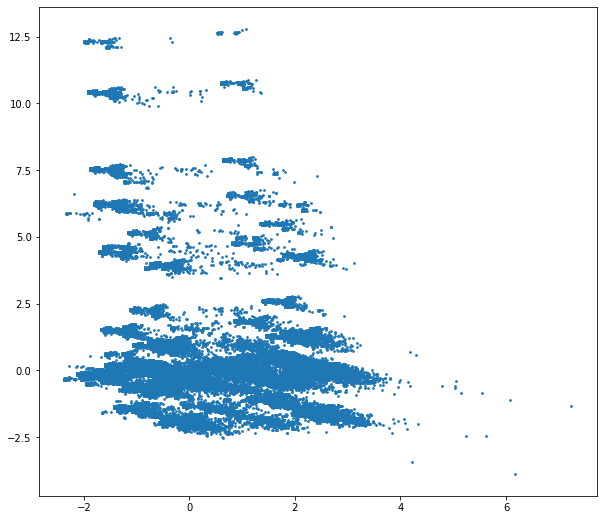

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.scatter(df3_scaled_pca[:, 1], df3_scaled_pca[:, 5], s=3, cmap='Spectral')

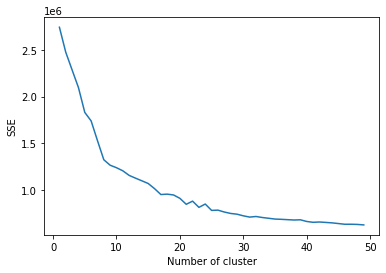

In [23]:
sse = {}
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, max_iter=10).fit(df3_scaled_pca[0:50000])
    #cluster_embedding["clusters"] = kmeans.labels_
    #print(cluster_embedding["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 25, random_state=0).fit(df3_scaled_pca)
cluster = kmeans.predict(df3_scaled_pca)
df3['cluster'] = cluster

In [25]:
df3['cluster'].value_counts(normalize = True)

6     0.100902
1     0.098526
3     0.095848
4     0.092276
2     0.087346
19    0.070759
0     0.068625
7     0.057808
23    0.052981
20    0.038472
22    0.036491
14    0.035463
24    0.029028
15    0.024999
18    0.024957
21    0.023299
16    0.016595
17    0.014117
11    0.010227
5     0.005847
9     0.005168
12    0.004427
8     0.003531
10    0.001559
13    0.000747
Name: cluster, dtype: float64

In [26]:
df3.groupby('cluster').mean().to_csv('cluster_transacoes.csv')

In [27]:
len(df2.query('chave_or.isna()').head())

5

In [29]:
df3['ds_grupo_mcc'] = df2['ds_grupo_mcc']

In [30]:
df3.groupby(['cluster', 'ds_grupo_mcc']).count().to_csv('cluster_transacoes_count_mcc.csv')

In [31]:
df3['ds_nome_estabelecimento'] = df2['ds_nome_estabelecimento']

In [32]:
df3.groupby(['cluster', 'ds_nome_estabelecimento']).count().to_csv('cluster_transacoes_count_estabelecimentos.csv')

In [2]:
df_estab = pd.read_csv('cluster_transacoes_count_estabelecimentos.csv')

In [4]:
df_estab = df_estab[['cluster', 'ds_nome_estabelecimento', 'flag_recorrente']]
df_estab.head()

,cluster,ds_nome_estabelecimento,flag_recorrente
0,0,BRA,2
1,0,BARRA DE SANT BRA,1
2,0,CLINICA*KATTIANNA R JUPI BRA,1
3,0,CLINICA*ODONTOFISIO TRINDADE BRA,1
4,0,CARVAO LENH RIODEJANEIRO BRA,1


In [31]:
df_estab.dtypes

cluster                     int64
ds_nome_estabelecimento    object
flag_recorrente             int64
dtype: object

In [76]:
df_agg = df_estab.loc[df_estab['cluster'] == 24].groupby('ds_nome_estabelecimento').agg({'flag_recorrente':['sum']})
df_agg.columns = df_agg.columns.droplevel(0)
df_agg = df_agg.reset_index()
df_agg = df_agg.rename(columns = {'sum':'n_clientes'})
df_agg.sort_values(by=['n_clientes'], ascending = False).head(20)

,ds_nome_estabelecimento,n_clientes
2195,EBANX*SHOPEE CURITIBA BRA,1057
594,APPLE.COM/BILL SAO PAULO BRA,685
4388,MERCPAG*MERCADOLIVRE OSASCO BRA,592
4841,MERCPAGO*MERCADOLIVRE OSASCO BRA,572
2194,EBANX*SHOPEE,433
528,AMAZONPRIMEBR SAO PAULO BRA,356
10341,UBER *UBER *TRIP SAO PAULO BRA,328
5541,NETFLIX.COM SAO PAULO BRA,317
5862,PAG*BOACOMPRA SAO PAULO BRA,287
1463,CLARO FLEX SAO PAULO BRA,272


In [38]:
clusters = df_estab['cluster'].unique()

In [46]:
for i in clusters:
    #print("cluster:" + str(i))
    df_agg = df_estab.loc[df_estab['cluster'] == i].groupby('ds_nome_estabelecimento').agg({'flag_recorrente':['sum']})
    df_agg.columns = df_agg.columns.droplevel(0)
    df_agg = df_agg.reset_index()
    df_agg = df_agg.rename(columns = {'sum':'n_clientes'})
    df_agg.sort_values(by=['n_clientes'], ascending = False).head()